In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
train_full_df = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")
X = train_full_df.drop('SalePrice', axis = 1)
y = train_full_df.SalePrice
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, test_size = 0.2)

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 1001 to 18
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    971 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          66 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  Overall

In [14]:
#object values filling with mode
object_cols = [cols for cols in X_train.columns if X_train[cols].dtype == "object"]
for i in object_cols:
    m = X_train[i].mode()[0]
    X_train[i].fillna(m, inplace = True)
    X_val[i].fillna(m, inplace = True)


object_cols_test = [cols for cols in X_test.columns if X_test[cols].dtype in ['object']]
for i in object_cols_test:
    m = X_test[i].mode()[0]
    X_test[i].fillna(m, inplace = True)
print(object_cols)
X_train.info()

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 1001 to 18
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    971 non-null    float64
 4   LotArea        1168 non-null   int64  
 5  

c:\users\my pc\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [15]:
#int type missing values handling
mis_col_int = [col for col in X_train.columns
              if X_train[col].dtype in ['int64', 'float64']]
for i in mis_col_int:
    m = X_train[i].mean()
    X_train[i].fillna(m, inplace = True )
    X_val[i].fillna(m, inplace = True)
    
mis_col_int_test = [col for col in X_train.columns
              if X_train[col].dtype in ['int64', 'float64']]
for i in mis_col_int:
    m = X_test[i].mean()
    X_test[i].fillna(m, inplace = True )
X_val.info()
    
    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 545 to 366
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    292 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          292 non-null    object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallC

In [16]:
low_car_cols = [col for col in X_train.columns if X_train[col].nunique()<10 and X_train[col].dtype == 'object']
high_car_cols = [item for item in object_cols if item not in low_car_cols]

X_train.drop(high_car_cols, axis = 1, inplace = True)
X_val.drop(high_car_cols, axis = 1, inplace = True)
X_test.drop(high_car_cols, axis = 1, inplace = True)

X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)
X_test = pd.get_dummies(X_test)
X_train, X_val = X_train.align(X_val, join = 'left', axis = 1)
X_train, X_test = X_train.align(X_test, join = 'left', axis=1)
X_train.drop('Id', axis = 1, inplace = True)
X_val.drop('Id', axis = 1, inplace = True)
X_test.drop('Id', axis = 1, inplace = True)





c:\users\my pc\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
nanvalues_val_col = [col for col in X_val.columns
                    if X_val[col].isnull().sum()>0 or X_test[col].isnull().sum()]
X_val.drop(nanvalues_val_col, axis = 1, inplace = True)
X_train.drop(nanvalues_val_col, axis = 1, inplace = True)
X_test.drop(nanvalues_val_col, axis = 1, inplace = True)

In [18]:
input_shape = X_train.shape[1]
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_val = std.transform(X_val)
X_test = std.fit_transform(X_test)

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

early_stoping = EarlyStopping(
    min_delta = 500,
    patience = 20,
    restore_best_weights = True,
    
)

model = keras.Sequential([
    layers.Dense(512, activation = 'relu', input_shape = [input_shape]),
    layers.Dense(512, activation = 'relu', activity_regularizer = regularizers.l1(1e-8)),
    layers.Dense(512, activation = 'relu', activity_regularizer = regularizers.l1(1e-8)),
    layers.Dense(1),
])
optimizers = keras.optimizers.Adam()
model.compile(
    optimizer = optimizers,
    loss = 'mae'
)




Epoch 1/200
12/12 [==============================] - 1s 57ms/step - loss: 181762.4375 - val_loss: 177281.7031
Epoch 2/200
12/12 [==============================] - 0s 22ms/step - loss: 181371.9062 - val_loss: 176363.1719
Epoch 3/200
12/12 [==============================] - 0s 20ms/step - loss: 179502.0781 - val_loss: 172711.9062
Epoch 4/200
12/12 [==============================] - 0s 19ms/step - loss: 172929.3906 - val_loss: 161286.0625
Epoch 5/200
12/12 [==============================] - 0s 20ms/step - loss: 154367.7500 - val_loss: 132039.7812
Epoch 6/200
12/12 [==============================] - 0s 22ms/step - loss: 113639.5000 - val_loss: 82317.6875
Epoch 7/200
12/12 [==============================] - 0s 22ms/step - loss: 61438.9922 - val_loss: 52966.3398
Epoch 8/200
12/12 [==============================] - 0s 21ms/step - loss: 45970.1172 - val_loss: 38864.0703
Epoch 9/200
12/12 [==============================] - 0s 21ms/step - loss: 35236.8203 - val_loss: 33362.5508
Epoch 10/200
12/1

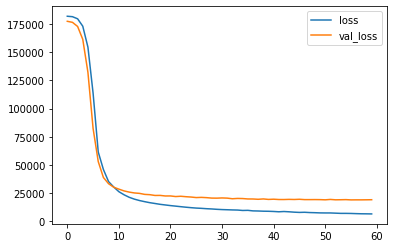

In [20]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_val, y_val),
    batch_size = 100,
    epochs = 200,
    callbacks = [early_stoping],
    
    
)
print(history)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();


In [21]:
y_pred = model.predict(X_test)
y_pred

array([[140957.48],
       [153009.34],
       [197242.86],
       ...,
       [190254.52],
       [109955.07],
       [260639.52]], dtype=float32)

In [22]:
pred = pd.DataFrame(y_pred)
df1 = pd.read_csv('sample_submission.csv')
final = pd.concat([df1['Id'], pred], axis = 1)
final.columns = ['Id', 'SalePrice']
final.to_csv('sample_submission.csv', index = False)